<a href="https://colab.research.google.com/github/sirishanarayansa/AI/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/sirishanarayansa/AI/main/winequality-red0.csv

--2021-05-10 00:50:27--  https://raw.githubusercontent.com/sirishanarayansa/AI/main/winequality-red0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85733 (84K) [text/plain]
Saving to: ‘winequality-red0.csv.2’

winequality-red0.cs 100%[===================>]  83.72K  --.-KB/s    in 0.002s  

2021-05-10 00:50:27 (39.3 MB/s) - ‘winequality-red0.csv.2’ saved [85733/85733]



In [ ]:
import numpy as np
dataset = np.genfromtxt('winequality-red0.csv', delimiter = ',', skip_header = True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(formatter = {'float': '{: 0.2f}'.format})

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X = dataset[:,]
Y = dataset[:,-1]

In [ ]:
min = X.min(axis = 0) 
max = X.max(axis = 0) 
X = (X - min) / (max - min)

In [ ]:
import random
np.random.shuffle(X)

In [ ]:
index_30percent = int(0.3 * len(X[:, 0]))
XVALID = X[:index_30percent, :-1]
YVALID = X[:index_30percent, -1]
XTRAIN = X[index_30percent:, :-1]
YTRAIN = X[index_30percent:, -1]

In [ ]:
high = len(YVALID) - sum(YVALID)
print("Baseline accuracy : ",high/len(YVALID))

Baseline accuracy :  0.4801670146137787


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
all_accuracy = []

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_11.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
model_1 = Sequential()
model_1.add(Dense(1, input_dim = 11, activation='sigmoid'))

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_11 = model_1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5185 - val_loss: 0.6718 - val_accuracy: 0.6138

Epoch 00001: val_loss improved from inf to 0.67181, saving model to model_11.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5971 - val_loss: 0.6640 - val_accuracy: 0.6326

Epoch 00002: val_loss improved from 0.67181 to 0.66402, saving model to model_11.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5979 - val_loss: 0.6598 - val_accuracy: 0.6576

Epoch 00003: val_loss improved from 0.66402 to 0.65977, saving model to model_11.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6538 - val_loss: 0.6567 - val_accuracy: 0.6514

Epoch 00004: val_loss improved from 0.65977 to 0.65672, saving model to model_11.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6577 - 

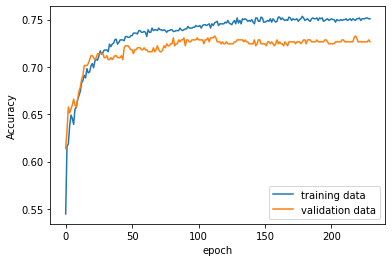

In [ ]:
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model_1.load_weights('model_11.hdf5')

In [ ]:
Q0 = model_1.predict(XVALID)
accuracy_all = model_1.evaluate(XVALID, YVALID)

all_accuracy.append(accuracy_all[1])

15/15 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7307


In [ ]:
print(all_accuracy)

[0.7306889295578003]


In [ ]:
model_2 = Sequential()
model_2.add(Dense(1, input_dim = 10, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_12.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_19 = model_2.fit(XTRAIN[:,[0,1,2,3,4,5,6,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,5,6,8,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6995 - accuracy: 0.5258 - val_loss: 0.6861 - val_accuracy: 0.5658

Epoch 00001: val_loss improved from inf to 0.68610, saving model to model_12.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5664 - val_loss: 0.6816 - val_accuracy: 0.5741

Epoch 00002: val_loss improved from 0.68610 to 0.68157, saving model to model_12.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5496 - val_loss: 0.6780 - val_accuracy: 0.5762

Epoch 00003: val_loss improved from 0.68157 to 0.67800, saving model to model_12.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5736 - val_loss: 0.6745 - val_accuracy: 0.5762

Epoch 00004: val_loss improved from 0.67800 to 0.67449, saving model to model_12.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6713 - 

In [ ]:
model_2.load_weights('model_12.hdf5')

In [ ]:
Q8 = model_2.predict(XVALID[:,[0,1,2,3,4,5,6,8,9,10]])
accuracy_19 = model_2.evaluate(XVALID[:,[0,1,2,3,4,5,6,8,9,10]], YVALID)

15/15 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.7307


In [ ]:
acc = []

In [ ]:
x2 = ['all_features', 'removed_7', 'removed_5', 'removed_3', 'removed_0', 'removed_2']

In [ ]:
acc.append(accuracy_all[1])

In [ ]:
#removing least important features itteratively

In [ ]:
acc.append(accuracy_19[1])

In [ ]:
print(acc)

[0.7306889295578003, 0.7306889295578003]


In [ ]:
model_3 = Sequential()
model_3.add(Dense(1, input_dim = 9, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_13.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_23 = model_3.fit(XTRAIN[:,[0,1,2,3,4,6,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,6,8,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.5389 - val_loss: 0.7001 - val_accuracy: 0.5094

Epoch 00001: val_loss improved from inf to 0.70010, saving model to model_13.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5536 - val_loss: 0.6958 - val_accuracy: 0.5094

Epoch 00002: val_loss improved from 0.70010 to 0.69578, saving model to model_13.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5270 - val_loss: 0.6918 - val_accuracy: 0.5136

Epoch 00003: val_loss improved from 0.69578 to 0.69178, saving model to model_13.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5249 - val_loss: 0.6878 - val_accuracy: 0.5157

Epoch 00004: val_loss improved from 0.69178 to 0.68777, saving model to model_13.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6790 - 

In [ ]:
model_3.load_weights('model_13.hdf5')

In [ ]:
Q12 = model_3.predict(XVALID[:,[0,1,2,3,4,6,8,9,10]])
accuracy_23 = model_3.evaluate(XVALID[:,[0,1,2,3,4,6,8,9,10]], YVALID)

acc.append(accuracy_23[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7265


In [ ]:
model_4 = Sequential()
model_4.add(Dense(1, input_dim = 8, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_14.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_24 = model_4.fit(XTRAIN[:,[0,1,2,4,6,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,4,6,8,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6999 - accuracy: 0.4843 - val_loss: 0.6941 - val_accuracy: 0.4969

Epoch 00001: val_loss improved from inf to 0.69414, saving model to model_14.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5477 - val_loss: 0.6890 - val_accuracy: 0.5407

Epoch 00002: val_loss improved from 0.69414 to 0.68896, saving model to model_14.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5419 - val_loss: 0.6849 - val_accuracy: 0.5741

Epoch 00003: val_loss improved from 0.68896 to 0.68485, saving model to model_14.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5610 - val_loss: 0.6815 - val_accuracy: 0.5741

Epoch 00004: val_loss improved from 0.68485 to 0.68152, saving model to model_14.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6761 - 

In [ ]:
model_4.load_weights('model_14.hdf5')

In [ ]:
Q12 = model_4.predict(XVALID[:,[0,1,2,4,6,8,9,10]])
accuracy_24 = model_4.evaluate(XVALID[:,[0,1,2,4,6,8,9,10]], YVALID)

acc.append(accuracy_24[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.7182


In [ ]:
model_5 = Sequential()
model_5.add(Dense(1, input_dim = 7, activation='sigmoid'))
model_5.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_15.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_25 = model_5.fit(XTRAIN[:,[1,2,4,6,8,9,10]], YTRAIN, validation_data=(XVALID[:,[1,2,4,6,8,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.7241 - accuracy: 0.3972 - val_loss: 0.7127 - val_accuracy: 0.4301

Epoch 00001: val_loss improved from inf to 0.71270, saving model to model_15.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4238 - val_loss: 0.7084 - val_accuracy: 0.4614

Epoch 00002: val_loss improved from 0.71270 to 0.70842, saving model to model_15.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4395 - val_loss: 0.7042 - val_accuracy: 0.4802

Epoch 00003: val_loss improved from 0.70842 to 0.70424, saving model to model_15.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4975 - val_loss: 0.7001 - val_accuracy: 0.4802

Epoch 00004: val_loss improved from 0.70424 to 0.70008, saving model to model_15.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7003 - 

In [ ]:
model_5.load_weights('model_15.hdf5')

In [ ]:
Q12 = model_5.predict(XVALID[:,[1,2,4,6,8,9,10]])
accuracy_25 = model_5.evaluate(XVALID[:,[1,2,4,6,8,9,10]], YVALID)

acc.append(accuracy_25[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7223


In [ ]:
model_6 = Sequential()
model_6.add(Dense(1, input_dim = 6, activation='sigmoid'))
model_6.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_16.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_26 = model_6.fit(XTRAIN[:,[1,4,6,8,9,10]], YTRAIN, validation_data=(XVALID[:,[1,4,6,8,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.7490 - accuracy: 0.4426 - val_loss: 0.7261 - val_accuracy: 0.4697

Epoch 00001: val_loss improved from inf to 0.72610, saving model to model_16.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.4174 - val_loss: 0.7172 - val_accuracy: 0.4029

Epoch 00002: val_loss improved from 0.72610 to 0.71723, saving model to model_16.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.3523 - val_loss: 0.7115 - val_accuracy: 0.3716

Epoch 00003: val_loss improved from 0.71723 to 0.71153, saving model to model_16.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.3947 - val_loss: 0.7071 - val_accuracy: 0.4175

Epoch 00004: val_loss improved from 0.71153 to 0.70707, saving model to model_16.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7068 - 

In [ ]:
model_6.load_weights('model_16.hdf5')

In [ ]:
Q12 = model_6.predict(XVALID[:,[1,4,6,8,9,10]])
accuracy_26 = model_6.evaluate(XVALID[:,[1,4,6,8,9,10]], YVALID)

acc.append(accuracy_26[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7223


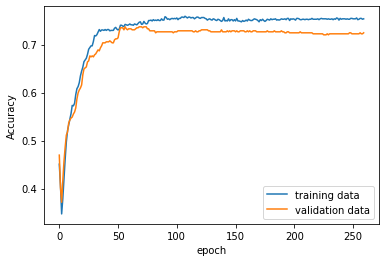

In [ ]:
plt.plot(history_26.history['accuracy'])
plt.plot(history_26.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
print(acc)

[0.7306889295578003, 0.7306889295578003, 0.7265135645866394, 0.7181628346443176, 0.7223381996154785, 0.7223381996154785]


In [ ]:
model_7 = Sequential()
model_7.add(Dense(1, input_dim = 5, activation='sigmoid'))
model_7.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_17.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_27 = model_7.fit(XTRAIN[:,[1,6,8,9,10]], YTRAIN, validation_data=(XVALID[:,[1,6,8,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.7497 - accuracy: 0.3830 - val_loss: 0.7348 - val_accuracy: 0.3466

Epoch 00001: val_loss improved from inf to 0.73481, saving model to model_17.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.3211 - val_loss: 0.7279 - val_accuracy: 0.3340

Epoch 00002: val_loss improved from 0.73481 to 0.72790, saving model to model_17.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.3147 - val_loss: 0.7227 - val_accuracy: 0.3633

Epoch 00003: val_loss improved from 0.72790 to 0.72271, saving model to model_17.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.3600 - val_loss: 0.7184 - val_accuracy: 0.3883

Epoch 00004: val_loss improved from 0.72271 to 0.71840, saving model to model_17.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7248 - 

In [ ]:
model_7.load_weights('model_17.hdf5')

In [ ]:
Q13 = model_7.predict(XVALID[:,[1,6,8,9,10]])
accuracy_27 = model_7.evaluate(XVALID[:,[1,6,8,9,10]], YVALID)

acc.append(accuracy_27[1])
x2.append('removed_4')

15/15 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.7244


In [ ]:
model_8 = Sequential()
model_8.add(Dense(1, input_dim = 4, activation='sigmoid'))
model_8.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_18.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_28 = model_8.fit(XTRAIN[:,[1,6,9,10]], YTRAIN, validation_data=(XVALID[:,[1,6,9,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6856 - accuracy: 0.5058 - val_loss: 0.6789 - val_accuracy: 0.5428

Epoch 00001: val_loss improved from inf to 0.67887, saving model to model_18.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5682 - val_loss: 0.6734 - val_accuracy: 0.6555

Epoch 00002: val_loss improved from 0.67887 to 0.67343, saving model to model_18.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6678 - val_loss: 0.6690 - val_accuracy: 0.7140

Epoch 00003: val_loss improved from 0.67343 to 0.66903, saving model to model_18.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6936 - val_loss: 0.6656 - val_accuracy: 0.6994

Epoch 00004: val_loss improved from 0.66903 to 0.66559, saving model to model_18.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6638 - 

In [ ]:
model_8.load_weights('model_18.hdf5')

In [ ]:
Q14 = model_8.predict(XVALID[:,[1,6,9,10]])
accuracy_28 = model_8.evaluate(XVALID[:,[1,6,9,10]], YVALID)

acc.append(accuracy_28[1])
x2.append('removed_8')

15/15 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.7307


In [ ]:
model_9 = Sequential()
model_9.add(Dense(1, input_dim = 3, activation='sigmoid'))
model_9.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_19.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_29 = model_9.fit(XTRAIN[:,[1,6,10]], YTRAIN, validation_data=(XVALID[:,[1,6,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6744 - accuracy: 0.5987 - val_loss: 0.6801 - val_accuracy: 0.5887

Epoch 00001: val_loss improved from inf to 0.68014, saving model to model_19.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6089 - val_loss: 0.6769 - val_accuracy: 0.5929

Epoch 00002: val_loss improved from 0.68014 to 0.67693, saving model to model_19.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6060 - val_loss: 0.6739 - val_accuracy: 0.5866

Epoch 00003: val_loss improved from 0.67693 to 0.67392, saving model to model_19.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6400 - val_loss: 0.6707 - val_accuracy: 0.5908

Epoch 00004: val_loss improved from 0.67392 to 0.67072, saving model to model_19.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6650 - 

In [ ]:
model_9.load_weights('model_19.hdf5')

In [ ]:
Q14 = model_9.predict(XVALID[:,[1,6,10]])
accuracy_29 = model_9.evaluate(XVALID[:,[1,6,10]], YVALID)

acc.append(accuracy_29[1])
x2.append('removed_9')

15/15 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7432


In [ ]:
model_10 = Sequential()
model_10.add(Dense(1, input_dim = 2, activation='sigmoid'))
model_10.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_20.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_30 = model_10.fit(XTRAIN[:,[6,10]], YTRAIN, validation_data=(XVALID[:,[6,10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 4ms/step - loss: 0.7846 - accuracy: 0.3496 - val_loss: 0.7700 - val_accuracy: 0.3486

Epoch 00001: val_loss improved from inf to 0.76997, saving model to model_20.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7838 - accuracy: 0.3101 - val_loss: 0.7626 - val_accuracy: 0.3382

Epoch 00002: val_loss improved from 0.76997 to 0.76263, saving model to model_20.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7678 - accuracy: 0.2989 - val_loss: 0.7564 - val_accuracy: 0.3236

Epoch 00003: val_loss improved from 0.76263 to 0.75637, saving model to model_20.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7574 - accuracy: 0.2915 - val_loss: 0.7513 - val_accuracy: 0.3090

Epoch 00004: val_loss improved from 0.75637 to 0.75134, saving model to model_20.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7512 - 

In [ ]:
model_10.load_weights('model_20.hdf5')

In [ ]:
Q15 = model_10.predict(XVALID[:,[6,10]])
accuracy_30 = model_10.evaluate(XVALID[:,[6,10]], YVALID)

acc.append(accuracy_30[1])
x2.append('removed_1')

15/15 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.6889


In [ ]:
model_11 = Sequential()
model_11.add(Dense(1, input_dim = 1, activation='sigmoid'))
model_11.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_21.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_31 = model_11.fit(XTRAIN[:,[10]], YTRAIN, validation_data=(XVALID[:,[10]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.7193 - accuracy: 0.4572 - val_loss: 0.7089 - val_accuracy: 0.4614

Epoch 00001: val_loss improved from inf to 0.70888, saving model to model_21.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.4180 - val_loss: 0.7047 - val_accuracy: 0.3215

Epoch 00002: val_loss improved from 0.70888 to 0.70466, saving model to model_21.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.2840 - val_loss: 0.7014 - val_accuracy: 0.3424

Epoch 00003: val_loss improved from 0.70466 to 0.70136, saving model to model_21.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.3618 - val_loss: 0.6986 - val_accuracy: 0.5010

Epoch 00004: val_loss improved from 0.70136 to 0.69860, saving model to model_21.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6989 - 

In [ ]:
model_11.load_weights('model_21.hdf5')

In [ ]:
Q16 = model_11.predict(XVALID[:,[10]])
accuracy_31 = model_11.evaluate(XVALID[:,[10]], YVALID)

acc.append(accuracy_31[1])
x2.append('removed_6')

15/15 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.6785


In [ ]:
model_12 = Sequential()
model_12.add(Dense(1, input_dim = 1, activation='sigmoid'))
model_12.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
callback_a = ModelCheckpoint(filepath = "model_22.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [ ]:
history_32 = model_12.fit(XTRAIN[:,[6]], YTRAIN, validation_data=(XVALID[:,[6]], YVALID), epochs=500, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/500
112/112 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.4355 - val_loss: 0.6818 - val_accuracy: 0.4927

Epoch 00001: val_loss improved from inf to 0.68184, saving model to model_22.hdf5
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5054 - val_loss: 0.6795 - val_accuracy: 0.5365

Epoch 00002: val_loss improved from 0.68184 to 0.67953, saving model to model_22.hdf5
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5195 - val_loss: 0.6779 - val_accuracy: 0.5908

Epoch 00003: val_loss improved from 0.67953 to 0.67795, saving model to model_22.hdf5
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5638 - val_loss: 0.6769 - val_accuracy: 0.6033

Epoch 00004: val_loss improved from 0.67795 to 0.67691, saving model to model_22.hdf5
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.6771 - 

In [ ]:
model_12.load_weights('model_22.hdf5')

In [ ]:
Q16 = model_12.predict(XVALID[:,[6]])
accuracy_32 = model_12.evaluate(XVALID[:,[6]], YVALID)

acc.append(accuracy_32[1])
x2.append('removed_10')

15/15 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6326


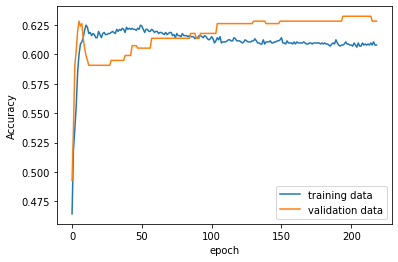

In [ ]:
plt.plot(history_32.history['accuracy'])
plt.plot(history_32.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
print(len(acc))
print(len(x2))

12
15


In [ ]:
x2 = ['all_features', 'removed_7', 'removed_5', 'removed_3', 'removed_0', 'removed_2', 'removed_4', 'removed_8', 'removed_9', 'removed_1', 'removed_6', 'removed_10']

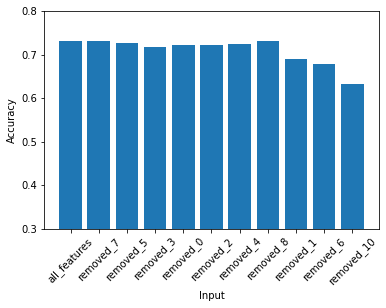

In [ ]:
plt.bar(x2, acc, align='center') 
plt.xlabel('Input')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0.3,0.8)
plt.show()

In [ ]:
model_0 = Sequential()
model_0.add(Dense(1, input_dim = 1, activation='sigmoid'))
model_0.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
history_0 = model_0.fit(XTRAIN[:, 0], YTRAIN, validation_data=(XVALID[:, 0], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 1s 3ms/step - loss: 0.7352 - accuracy: 0.4926 - val_loss: 0.7383 - val_accuracy: 0.4781
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7507 - accuracy: 0.4306 - val_loss: 0.7283 - val_accuracy: 0.4802
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.4482 - val_loss: 0.7204 - val_accuracy: 0.4697
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.4797 - val_loss: 0.7154 - val_accuracy: 0.4593
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.5037 - val_loss: 0.7120 - val_accuracy: 0.4384
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.4780 - val_loss: 0.7096 - val_accuracy: 0.4363
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4848 - val_loss: 0.7081 - val_accuracy: 0.4384
Epoch 

In [ ]:
P0 = model_0.predict(XVALID[:, 0])
accuracy_0 = model_0.evaluate(XVALID[:, 0], YVALID)

print(accuracy_0[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5198
0.519832968711853


In [ ]:
ind_accuracy = []

In [ ]:
ind_accuracy.append(accuracy_0[1])

In [ ]:
print(ind_accuracy)

[0.519832968711853]


In [ ]:
history_1 = model_0.fit(XTRAIN[:, 1], YTRAIN, validation_data=(XVALID[:, 1], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5420 - val_loss: 0.6888 - val_accuracy: 0.5198
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5420 - val_loss: 0.6876 - val_accuracy: 0.5219
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5437 - val_loss: 0.6867 - val_accuracy: 0.5240
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5446 - val_loss: 0.6859 - val_accuracy: 0.5261
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5464 - val_loss: 0.6852 - val_accuracy: 0.5282
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5500 - val_loss: 0.6844 - val_accuracy: 0.5324
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5580 - val_loss: 0.6837 - val_accuracy: 0.5365
Epoch 

In [ ]:
P1 = model_0.predict(XVALID[:, 1])
accuracy_1 = model_0.evaluate(XVALID[:, 1], YVALID)

ind_accuracy.append(accuracy_1[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6221


In [ ]:
print(ind_accuracy)

[0.519832968711853, 0.6221294403076172]


In [ ]:
history_2 = model_0.fit(XTRAIN[:, 2], YTRAIN, validation_data=(XVALID[:, 2], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.4286 - val_loss: 0.7463 - val_accuracy: 0.4134
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.4295 - val_loss: 0.7447 - val_accuracy: 0.4134
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7346 - accuracy: 0.4286 - val_loss: 0.7432 - val_accuracy: 0.4154
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.4357 - val_loss: 0.7417 - val_accuracy: 0.4217
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.4366 - val_loss: 0.7402 - val_accuracy: 0.4238
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.4429 - val_loss: 0.7389 - val_accuracy: 0.4238
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.4482 - val_loss: 0.7375 - val_accuracy: 0.4301
Epoch 

In [ ]:
P2 = model_0.predict(XVALID[:, 2])
accuracy_2 = model_0.evaluate(XVALID[:, 2], YVALID)

ind_accuracy.append(accuracy_2[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5198


In [ ]:
history_3 = model_0.fit(XTRAIN[:, 3], YTRAIN, validation_data=(XVALID[:, 3], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5411 - val_loss: 0.6938 - val_accuracy: 0.5198
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5411 - val_loss: 0.6937 - val_accuracy: 0.5198
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.5198
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.5198
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.5198
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.5198
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.5198
Epoch 

In [ ]:
P3 = model_0.predict(XVALID[:, 3])
accuracy_3 = model_0.evaluate(XVALID[:, 3], YVALID)

ind_accuracy.append(accuracy_3[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5198


In [ ]:
history_4 = model_0.fit(XTRAIN[:, 4], YTRAIN, validation_data=(XVALID[:, 4], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5411 - val_loss: 0.6940 - val_accuracy: 0.5198
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5411 - val_loss: 0.6939 - val_accuracy: 0.5198
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5411 - val_loss: 0.6938 - val_accuracy: 0.5198
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.5198
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5411 - val_loss: 0.6935 - val_accuracy: 0.5198
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5411 - val_loss: 0.6934 - val_accuracy: 0.5198
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5411 - val_loss: 0.6933 - val_accuracy: 0.5198
Epoch 

In [ ]:
P4 = model_0.predict(XVALID[:, 4])
accuracy_4 = model_0.evaluate(XVALID[:, 4], YVALID)

ind_accuracy.append(accuracy_4[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5282


In [ ]:
history_5 = model_0.fit(XTRAIN[:, 5], YTRAIN, validation_data=(XVALID[:, 5], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5437 - val_loss: 0.6898 - val_accuracy: 0.5386
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5429 - val_loss: 0.6897 - val_accuracy: 0.5386
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5446 - val_loss: 0.6897 - val_accuracy: 0.5386
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5437 - val_loss: 0.6897 - val_accuracy: 0.5386
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5429 - val_loss: 0.6897 - val_accuracy: 0.5386
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5402 - val_loss: 0.6898 - val_accuracy: 0.5386
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5420 - val_loss: 0.6898 - val_accuracy: 0.5386
Epoch 

In [ ]:
P5 = model_0.predict(XVALID[:, 5])
accuracy_5 = model_0.evaluate(XVALID[:, 5], YVALID)

ind_accuracy.append(accuracy_5[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5386


In [ ]:
print(len(ind_accuracy))

6


In [ ]:
history_6 = model_0.fit(XTRAIN[:, 6], YTRAIN, validation_data=(XVALID[:, 6], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5589 - val_loss: 0.6845 - val_accuracy: 0.5470
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5723 - val_loss: 0.6839 - val_accuracy: 0.5574
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5759 - val_loss: 0.6833 - val_accuracy: 0.5658
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5813 - val_loss: 0.6827 - val_accuracy: 0.5699
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5875 - val_loss: 0.6823 - val_accuracy: 0.5783
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5902 - val_loss: 0.6817 - val_accuracy: 0.5762
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5964 - val_loss: 0.6812 - val_accuracy: 0.5866
Epoch 

In [ ]:
P6 = model_0.predict(XVALID[:, 6])
accuracy_6 = model_0.evaluate(XVALID[:, 6], YVALID)

ind_accuracy.append(accuracy_6[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.6075


In [ ]:
history_7 = model_0.fit(XTRAIN[:, 7], YTRAIN, validation_data=(XVALID[:, 7], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7509 - accuracy: 0.4884 - val_loss: 0.7289 - val_accuracy: 0.4948
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.5009 - val_loss: 0.7137 - val_accuracy: 0.5115
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.5134 - val_loss: 0.7026 - val_accuracy: 0.5303
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5429 - val_loss: 0.6947 - val_accuracy: 0.5720
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5679 - val_loss: 0.6903 - val_accuracy: 0.5846
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5884 - val_loss: 0.6870 - val_accuracy: 0.5825
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5848 - val_loss: 0.6852 - val_accuracy: 0.5470
Epoch 

In [ ]:
P7 = model_0.predict(XVALID[:, 7])
accuracy_7 = model_0.evaluate(XVALID[:, 7], YVALID)

ind_accuracy.append(accuracy_7[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5198


In [ ]:
history_8 = model_0.fit(XTRAIN[:, 8], YTRAIN, validation_data=(XVALID[:, 8], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5330 - val_loss: 0.6961 - val_accuracy: 0.5407
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5321 - val_loss: 0.6957 - val_accuracy: 0.5428
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5348 - val_loss: 0.6955 - val_accuracy: 0.5428
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5348 - val_loss: 0.6952 - val_accuracy: 0.5428
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5312 - val_loss: 0.6950 - val_accuracy: 0.5491
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5304 - val_loss: 0.6949 - val_accuracy: 0.5491
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5304 - val_loss: 0.6947 - val_accuracy: 0.5491
Epoch 

In [ ]:
P8 = model_0.predict(XVALID[:, 8])
accuracy_8 = model_0.evaluate(XVALID[:, 8], YVALID)

ind_accuracy.append(accuracy_8[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5407


In [ ]:
history_9 = model_0.fit(XTRAIN[:, 9], YTRAIN, validation_data=(XVALID[:, 9], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.5429 - val_loss: 0.7361 - val_accuracy: 0.5219
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.5437 - val_loss: 0.7307 - val_accuracy: 0.5261
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.5464 - val_loss: 0.7265 - val_accuracy: 0.5282
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.5455 - val_loss: 0.7231 - val_accuracy: 0.5324
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.5455 - val_loss: 0.7207 - val_accuracy: 0.5303
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.5446 - val_loss: 0.7189 - val_accuracy: 0.5303
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.5429 - val_loss: 0.7171 - val_accuracy: 0.5303
Epoch 

In [ ]:
P9 = model_0.predict(XVALID[:, 9])
accuracy_9 = model_0.evaluate(XVALID[:, 9], YVALID)

ind_accuracy.append(accuracy_9[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5198


In [ ]:
history_10 = model_0.fit(XTRAIN[:, 10], YTRAIN, validation_data=(XVALID[:, 10], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5411 - val_loss: 0.6845 - val_accuracy: 0.5198
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5411 - val_loss: 0.6831 - val_accuracy: 0.5198
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5411 - val_loss: 0.6815 - val_accuracy: 0.5198
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5411 - val_loss: 0.6801 - val_accuracy: 0.5198
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5411 - val_loss: 0.6787 - val_accuracy: 0.5198
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5411 - val_loss: 0.6773 - val_accuracy: 0.5198
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5411 - val_loss: 0.6760 - val_accuracy: 0.5198
Epoch 

In [ ]:
P10 = model_0.predict(XVALID[:, 10])
accuracy_10 = model_0.evaluate(XVALID[:, 10], YVALID)

ind_accuracy.append(accuracy_10[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6889


In [ ]:
print(ind_accuracy)
print(len(ind_accuracy))

[0.519832968711853, 0.6221294403076172, 0.519832968711853, 0.519832968711853, 0.5281836986541748, 0.5386221408843994, 0.6075156331062317, 0.519832968711853, 0.5407097935676575, 0.519832968711853, 0.6889352798461914]
11


In [ ]:
x = ['feature0','feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10']

In [ ]:
print(len(ind_accuracy))
print(len(x))

11
11


In [ ]:
import matplotlib.pyplot as plt

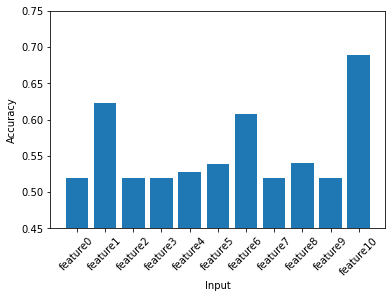

In [ ]:
plt.bar(x, ind_accuracy, align='center') 
plt.xlabel('Input')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0.45,0.75)
plt.show()

In [ ]:
history_12 = model_2.fit(XTRAIN[:,[1,2,3,4,5,6,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[1,2,3,4,5,6,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.8630 - accuracy: 0.5893 - val_loss: 0.8161 - val_accuracy: 0.6075

Epoch 00001: val_loss did not improve from 0.66191
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.7907 - accuracy: 0.6125 - val_loss: 0.7622 - val_accuracy: 0.6347

Epoch 00002: val_loss did not improve from 0.66191
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.6321 - val_loss: 0.7254 - val_accuracy: 0.6221

Epoch 00003: val_loss did not improve from 0.66191
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.6375 - val_loss: 0.7039 - val_accuracy: 0.6180

Epoch 00004: val_loss did not improve from 0.66191
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6491 - val_loss: 0.6924 - val_accuracy: 0.6159

Epoch 00005: val_loss did not improve from 0.66191
Epoch 6/1000
112/112

In [ ]:
Q1 = model_2.predict(XVALID[:,[1,2,3,4,5,6,7,8,9,10]])
accuracy_12 = model_2.evaluate(XVALID[:,[1,2,3,4,5,6,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_12[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7140


In [ ]:
history_13 = model_2.fit(XTRAIN[:,[0,2,3,4,5,6,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,2,3,4,5,6,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6938 - val_loss: 0.6401 - val_accuracy: 0.6514

Epoch 00001: val_loss did not improve from 0.54477
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.6982 - val_loss: 0.6375 - val_accuracy: 0.6534

Epoch 00002: val_loss did not improve from 0.54477
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6946 - val_loss: 0.6353 - val_accuracy: 0.6576

Epoch 00003: val_loss did not improve from 0.54477
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6946 - val_loss: 0.6332 - val_accuracy: 0.6472

Epoch 00004: val_loss did not improve from 0.54477
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.6955 - val_loss: 0.6313 - val_accuracy: 0.6493

Epoch 00005: val_loss did not improve from 0.54477
Epoch 6/1000
112/112

In [ ]:
Q2 = model_2.predict(XVALID[:,[0,2,3,4,5,6,7,8,9,10]])
accuracy_13 = model_2.evaluate(XVALID[:,[0,2,3,4,5,6,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_13[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.6931


In [ ]:
history_14 = model_2.fit(XTRAIN[:,[0,1,3,4,5,6,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,3,4,5,6,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7232 - val_loss: 0.5780 - val_accuracy: 0.6952

Epoch 00001: val_loss did not improve from 0.54477
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7223 - val_loss: 0.5773 - val_accuracy: 0.6952

Epoch 00002: val_loss did not improve from 0.54477
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7241 - val_loss: 0.5765 - val_accuracy: 0.6952

Epoch 00003: val_loss did not improve from 0.54477
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7250 - val_loss: 0.5758 - val_accuracy: 0.6973

Epoch 00004: val_loss did not improve from 0.54477
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7250 - val_loss: 0.5752 - val_accuracy: 0.6973

Epoch 00005: val_loss did not improve from 0.54477
Epoch 6/1000
112/112

In [ ]:
Q3 = model_2.predict(XVALID[:,[0,1,3,4,5,6,7,8,9,10]])
accuracy_14 = model_2.evaluate(XVALID[:,[0,1,3,4,5,6,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_14[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7223


In [ ]:
history_15 = model_2.fit(XTRAIN[:,[0,1,2,4,5,6,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,4,5,6,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7455 - val_loss: 0.5477 - val_accuracy: 0.7182

Epoch 00001: val_loss did not improve from 0.54477
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7482 - val_loss: 0.5473 - val_accuracy: 0.7161

Epoch 00002: val_loss did not improve from 0.54477
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7491 - val_loss: 0.5469 - val_accuracy: 0.7161

Epoch 00003: val_loss did not improve from 0.54477
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7455 - val_loss: 0.5467 - val_accuracy: 0.7203

Epoch 00004: val_loss did not improve from 0.54477
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7455 - val_loss: 0.5467 - val_accuracy: 0.7203

Epoch 00005: val_loss did not improve from 0.54477
Epoch 6/1000
112/112

In [ ]:
Q4 = model_2.predict(XVALID[:,[0,1,2,4,5,6,7,8,9,10]])
accuracy_15 = model_2.evaluate(XVALID[:,[0,1,2,4,5,6,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_15[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7203


In [ ]:
history_16 = model_2.fit(XTRAIN[:,[0,1,2,3,5,6,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,5,6,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7446 - val_loss: 0.5652 - val_accuracy: 0.7223

Epoch 00001: val_loss did not improve from 0.54477
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7455 - val_loss: 0.5650 - val_accuracy: 0.7265

Epoch 00002: val_loss did not improve from 0.54477
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7455 - val_loss: 0.5645 - val_accuracy: 0.7265

Epoch 00003: val_loss did not improve from 0.54477
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7446 - val_loss: 0.5645 - val_accuracy: 0.7265

Epoch 00004: val_loss did not improve from 0.54477
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7420 - val_loss: 0.5641 - val_accuracy: 0.7182

Epoch 00005: val_loss did not improve from 0.54477
Epoch 6/1000
112/112

In [ ]:
Q5 = model_2.predict(XVALID[:,[0,1,2,3,5,6,7,8,9,10]])
accuracy_16 = model_2.evaluate(XVALID[:,[0,1,2,3,5,6,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_16[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7328


In [ ]:
history_17 = model_2.fit(XTRAIN[:,[0,1,2,3,4,6,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,6,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7464 - val_loss: 0.5703 - val_accuracy: 0.7056

Epoch 00001: val_loss did not improve from 0.54477
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7437 - val_loss: 0.5699 - val_accuracy: 0.7035

Epoch 00002: val_loss did not improve from 0.54477
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7437 - val_loss: 0.5698 - val_accuracy: 0.7056

Epoch 00003: val_loss did not improve from 0.54477
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7464 - val_loss: 0.5697 - val_accuracy: 0.7098

Epoch 00004: val_loss did not improve from 0.54477
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7455 - val_loss: 0.5697 - val_accuracy: 0.7098

Epoch 00005: val_loss did not improve from 0.54477
Epoch 6/1000
112/112

In [ ]:
Q6 = model_2.predict(XVALID[:,[0,1,2,3,4,6,7,8,9,10]])
accuracy_17 = model_2.evaluate(XVALID[:,[0,1,2,3,4,6,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_17[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7265


In [ ]:
history_18 = model_2.fit(XTRAIN[:,[0,1,2,3,4,5,7,8,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,5,7,8,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7304 - val_loss: 0.5569 - val_accuracy: 0.6994

Epoch 00001: val_loss did not improve from 0.54235
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7321 - val_loss: 0.5561 - val_accuracy: 0.7015

Epoch 00002: val_loss did not improve from 0.54235
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7348 - val_loss: 0.5556 - val_accuracy: 0.6994

Epoch 00003: val_loss did not improve from 0.54235
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7357 - val_loss: 0.5554 - val_accuracy: 0.6994

Epoch 00004: val_loss did not improve from 0.54235
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7393 - val_loss: 0.5554 - val_accuracy: 0.6994

Epoch 00005: val_loss did not improve from 0.54235
Epoch 6/1000
112/112

In [ ]:
Q7 = model_2.predict(XVALID[:,[0,1,2,3,4,5,7,8,9,10]])
accuracy_18 = model_2.evaluate(XVALID[:,[0,1,2,3,4,5,7,8,9,10]], YVALID)

all_accuracy.append(accuracy_18[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7119


In [ ]:
all_accuracy.append(accuracy_19[1])

In [ ]:
history_20 = model_2.fit(XTRAIN[:,[0,1,2,3,4,5,6,7,9,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,5,6,7,9,10]], YVALID), epochs=1000, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7518 - val_loss: 0.5510 - val_accuracy: 0.7119

Epoch 00001: val_loss did not improve from 0.54235
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7518 - val_loss: 0.5508 - val_accuracy: 0.7161

Epoch 00002: val_loss did not improve from 0.54235
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7536 - val_loss: 0.5508 - val_accuracy: 0.7140

Epoch 00003: val_loss did not improve from 0.54235
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7491 - val_loss: 0.5507 - val_accuracy: 0.7140

Epoch 00004: val_loss did not improve from 0.54235
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7500 - val_loss: 0.5506 - val_accuracy: 0.7098

Epoch 00005: val_loss did not improve from 0.54235
Epoch 6/1000
112/112

In [ ]:
Q9 = model_2.predict(XVALID[:,[0,1,2,3,4,5,6,7,9,10]])
accuracy_20 = model_2.evaluate(XVALID[:,[0,1,2,3,4,5,6,7,9,10]], YVALID)

all_accuracy.append(accuracy_20[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.7244


In [ ]:
history_21 = model_2.fit(XTRAIN[:,[0,1,2,3,4,5,6,7,8,10]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,5,6,7,8,10]], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6420 - val_loss: 0.7193 - val_accuracy: 0.6263
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6661 - val_loss: 0.6755 - val_accuracy: 0.6347
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6830 - val_loss: 0.6476 - val_accuracy: 0.6555
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6955 - val_loss: 0.6330 - val_accuracy: 0.6722
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7107 - val_loss: 0.6246 - val_accuracy: 0.6764
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7134 - val_loss: 0.6189 - val_accuracy: 0.6827
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7223 - val_loss: 0.6152 - val_accuracy: 0.6848
Epoch 

In [ ]:
Q10 = model_2.predict(XVALID[:,[0,1,2,3,4,5,6,7,8,10]])
accuracy_21 = model_2.evaluate(XVALID[:,[0,1,2,3,4,5,6,7,8,10]], YVALID)

all_accuracy.append(accuracy_21[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7077


In [ ]:
history_22 = model_2.fit(XTRAIN[:,[0,1,2,3,4,5,6,7,8,9]], YTRAIN, validation_data=(XVALID[:,[0,1,2,3,4,5,6,7,8,9]], YVALID), epochs = 64, batch_size=10)

Epoch 1/64
112/112 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6732 - val_loss: 0.6136 - val_accuracy: 0.6681
Epoch 2/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6920 - val_loss: 0.6076 - val_accuracy: 0.6681
Epoch 3/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.6929 - val_loss: 0.6054 - val_accuracy: 0.6743
Epoch 4/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.6973 - val_loss: 0.6048 - val_accuracy: 0.6701
Epoch 5/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.6938 - val_loss: 0.6047 - val_accuracy: 0.6701
Epoch 6/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6982 - val_loss: 0.6047 - val_accuracy: 0.6764
Epoch 7/64
112/112 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7009 - val_loss: 0.6046 - val_accuracy: 0.6806
Epoch 

In [ ]:
Q11 = model_2.predict(XVALID[:,[0,1,2,3,4,5,6,7,8,9]])
accuracy_22 = model_2.evaluate(XVALID[:,[0,1,2,3,4,5,6,7,8,9]], YVALID)

all_accuracy.append(accuracy_22[1])

15/15 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6827


In [ ]:
print(len(all_accuracy))
print(all_accuracy)



12
[0.7306889295578003, 0.7139874696731567, 0.6931106448173523, 0.7223381996154785, 0.7202505469322205, 0.7327766418457031, 0.7265135645866394, 0.7118998169898987, 0.7306889295578003, 0.7244259119033813, 0.7077244520187378, 0.6826722621917725]


In [ ]:
x1 = ['all_features','removed_feature0','removed_feature1','removed_feature2','removed_feature3','removed_feature4','removed_feature5','removed_feature6','removed_feature7','removed_feature8','removed_feature9','removed_feature10']

In [ ]:
print(len(x1))

12


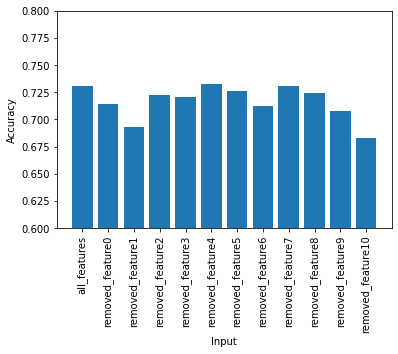

In [ ]:
plt.bar(x1, all_accuracy, align='center') 
plt.xlabel('Input')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.ylim(0.6,0.8)
plt.show()

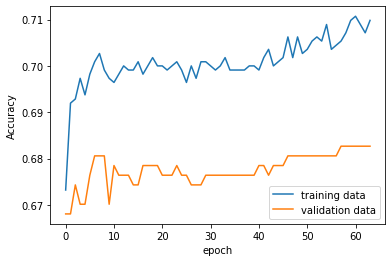

In [ ]:
plt.plot(history_22.history['accuracy'])
plt.plot(history_22.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()